<a href="https://colab.research.google.com/github/arkinbhagat/MSc-Project/blob/main/Project_Prototype_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import random
from datetime import datetime
from networkx.algorithms.coloring.greedy_coloring import greedy_color
from networkx.algorithms.coloring.equitable_coloring import equitable_color

In [ ]:
def getduration(exam):
  return(exams.loc[exams['ExamID'] == exam]['Duration'].item())

def getcapacity(room):
  return(rooms.loc[rooms['Room'] == room]['Total Capacity'].item())

def getstudents(exam):
  return(list(enrolments.loc[enrolments['ExamID'] == exam, 'StudentID']))

def getstudentcount(exam):
  return(len(list(enrolments.loc[enrolments['ExamID'] == exam, 'StudentID'])))

def getusedhours(room, slot):
  return(allslots.loc[(allslots['Room'] == room) & (allslots['Slot'] == slot)]['Used Hours'].item())

def getusedcapacity(room, slot):
  return(allslots.loc[(allslots['Room'] == room) & (allslots['Slot'] == slot)]['Used Capacity'].item())  
  
def setusedhours(room, slot, num):
  x = allslots.index[(allslots.Room==room) & (allslots.Slot==slot)].item()
  allslots.loc[x, "Used Hours"] = num

def setusedcapacity(room, slot, num):
  x = allslots.index[(allslots.Room==room) & (allslots.Slot==slot)].item()
  allslots.loc[x, "Used Capacity"] = num

def costfunction(df):
 return(df[(df["Total Capacity"]*df["Scheduled Exams"]<df["Used Capacity"]) | (df["Total Hours"]<df["Used Hours"])]["Slot"].count()) 

def check_conflict(k, idx):
  if((network.has_edge(allslots.loc[idx, "Exam 1"], k)) | (network.has_edge(allslots.loc[idx, "Exam 2"], k)) | (network.has_edge(allslots.loc[idx, "Exam 3"], k))):
        return(True)   

def remove_exam(k, idx):
    allslots.loc[idx, "Used Capacity"] -= getstudentcount(k)
    allslots.loc[idx, "Used Hours"] -= getduration(k)
    allslots.loc[idx, "Scheduled Exams"] -= 1    

    if(allslots.loc[idx, "Exam 1"] == k):
      allslots.loc[idx, "Exam 1"] = None
    elif(allslots.loc[idx, "Exam 2"] == k):
      allslots.loc[idx, "Exam 2"] = None
    elif(allslots.loc[idx, "Exam 3"] == k):
      allslots.loc[idx, "Exam 3"] = None  

def add_exam(k, idx):
    allslots.loc[idx, "Used Capacity"] += getstudentcount(k)
    allslots.loc[idx, "Used Hours"] += getduration(k)
    allslots.loc[idx, "Scheduled Exams"] += 1 

    if(allslots.loc[idx, "Exam 1"] == None):
      allslots.loc[idx, "Exam 1"] = k
    elif(allslots.loc[idx, "Exam 2"] == None):
      allslots.loc[idx, "Exam 2"] = k
    elif(allslots.loc[idx, "Exam 3"] == None):
      allslots.loc[idx, "Exam 3"] = k    
      

def swap_exams(exam1, exam2):
  index_e1 = allslots.loc[(allslots['Exam 1'] == exam1) | (allslots['Exam 2'] == exam1) | (allslots['Exam 3'] == exam1)].index.item()
  index_e2 = allslots.loc[(allslots['Exam 1'] == exam2) | (allslots['Exam 2'] == exam2) | (allslots['Exam 3'] == exam2)].index.item() 

  if(not(check_conflict(exam1, index_e2) and check_conflict(exam2, index_e1))):
    remove_exam(exam1, index_e1)
    add_exam(exam2, index_e1)  

    remove_exam(exam2, index_e2)
    add_exam(exam1, index_e2)    

In [ ]:
stud_cols = ["StudentID", "CourseID"]
students = pd.read_csv("students.txt", delimiter=" ", names=stud_cols)
courseid = students["CourseID"].unique()
studentid = students["StudentID"].unique()

enrol_cols = ["StudentID", "ExamID"]
enrolments = pd.read_csv("enrolments.txt", delimiter=" ", names=enrol_cols)
examid = enrolments["ExamID"].unique()
students_per_exam = dict(enrolments.groupby(["ExamID"])["ExamID"].count())

exam_cols = ["ExamID", "Exam_Name", "Duration", "Department"]
exams = pd.read_csv("exams.csv", names=exam_cols)
exams['Student Count'] = exams['ExamID'].astype(str).map(students_per_exam) 

timeslots_cols = ["Slot", "Total Hours"]
timeslots = pd.read_csv("timeslots.csv", names=timeslots_cols)
slots = timeslots["Slot"]

rooms_cols = ["Room", "Total Capacity"]
rooms = pd.read_csv("rooms.csv", names=rooms_cols)
roomid = rooms["Room"]

allslots = pd.merge(rooms, timeslots, how = 'cross')
allslots = allslots.reindex(columns=["Room", "Slot", "Total Capacity", "Total Hours"])

In [ ]:
allslots["Used Capacity"] = 0
allslots["Used Hours"] = 0
allslots["Exam 1"] = None
allslots["Exam 2"] = None
allslots["Exam 3"] = None
allslots["Scheduled Exams"] = 0

In [ ]:
print(students)
print(enrolments)
print(exams)
print(allslots)

       StudentID CourseID
0     A890186790     R100
1     A891097581     R200
2     A892884191     Q400
3     A892884227     Q400
4     A892884294     V700
...          ...      ...
7891  F946795217     H716
7892  F946865093     Y120
7893  F947745271     H300
7894  F947812713     HJ35
7895  F948091126     HJ35

[7896 rows x 2 columns]
        StudentID    ExamID
0      A890186790  R13001E1
1      A890186790  R13006E1
2      A890186790  R13016E1
3      A890186790  R13021E1
4      A890186790  R13022E1
...           ...       ...
33992  F947812713  J51IMAE1
33993  F948091126  H31BDAE1
33994  F948091126  H31DM1E1
33995  F948091126  HGAEM2E1
33996  F948091126  J51IMAE1

[33997 rows x 2 columns]
       ExamID                                  Exam_Name  Duration Department  \
0    AA2016E1  OPERA STUDIES, I                                1.5         GM   
1    AA3008E1  HOLLYWOOD & THE EUROPEAN CINEMA                 3.0         AI   
2    AAA011E1  INTRODUCTION TO ISLAM                      

In [ ]:
ct = pd.crosstab(enrolments["ExamID"], enrolments["StudentID"])
ct = ct.astype(bool)

overlaps = []
for student in studentid:
  overlaps.append(list(ct.loc[ct[student]].index))

print(overlaps)

[['R13001E1', 'R13006E1', 'R13016E1', 'R13021E1', 'R13022E1'], ['R23102E1', 'R23107E1', 'R23111E1', 'R23117E1', 'R23209E1'], ['Q4B102E1'], ['AA3008E1'], ['V73232E1', 'V73MD1E1'], ['Q3A308E1', 'V62200E1'], ['V73128E1'], ['V73232E1', 'V73MD1E1'], ['V73232E1', 'V73MD1E1'], ['V73232E1', 'V73MD1E1'], ['V73232E1', 'V73MD1E1'], ['V73232E1', 'V73MD1E1'], ['R13001E1', 'R13003E1', 'R13012E1', 'R13021E1'], ['V73127E1', 'V73128E1', 'V73232E1', 'V73MD1E1'], ['Q83184E1', 'Q8B075E1', 'Q8B094E1'], ['AA3008E1', 'Q4B104E1'], ['V13119E1'], ['V73232E1', 'V73MD1E1'], ['V73232E1'], ['R13009E1', 'R23102E1', 'R23107E1', 'R23111E1', 'R23209E1'], ['V72AINE1', 'V73232E1', 'V73MD1E1'], ['R23104E1', 'R23107E1', 'R23111E1', 'V83123E1', 'V83138E1'], ['R13001E1', 'R13016E1', 'R13021E1', 'R13023E1'], ['R13003E1', 'R13021E1', 'R43204E1'], ['R13003E1', 'R13016E1', 'R4B107E1'], ['R23102E1', 'R23111E1', 'R23117E1', 'R23209E1'], ['R13011E1', 'R13021E1', 'R13023E1', 'R23104E1', 'R23117E1'], ['R13005E1', 'R13011E1', 'R43204E

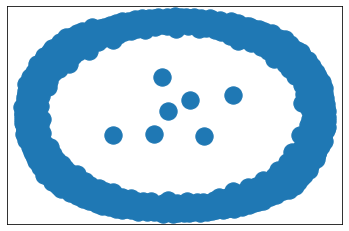

In [ ]:
network = nx.Graph()
network.add_nodes_from(examid)
nx.draw_networkx(network, with_labels=False)

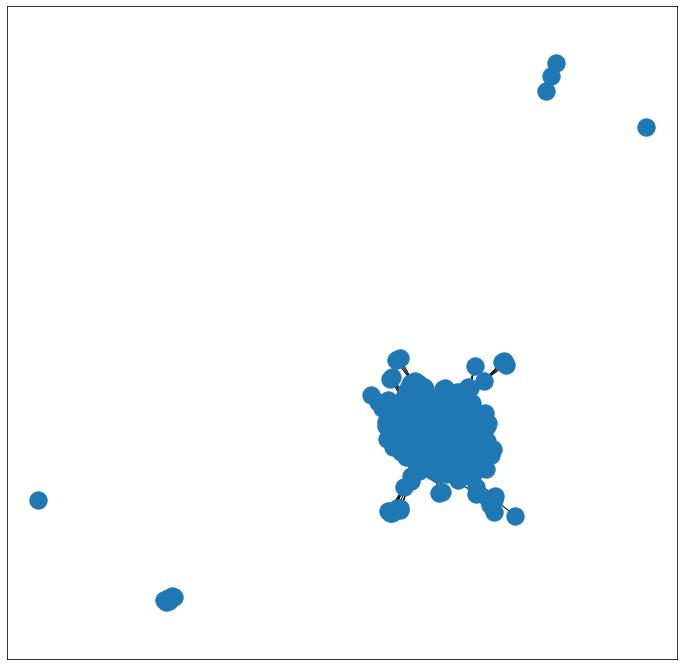

In [ ]:
for sublist in overlaps:
   for pair in itertools.combinations(sublist, 2):
      network.add_edge(pair[0], pair[1])
fig = plt.figure(figsize=(12,12))
nx.draw_networkx(network, with_labels=False)   

In [ ]:
total_nodes = len(list(network.nodes))
actual_edges = len(network.edges)
possible_edges = (total_nodes*(total_nodes-1))/2
degree = max(dict(network.degree).values())
print("Total Nodes: ", total_nodes)
print("Actual Edges: ", actual_edges)
print("Possible Edges: ", possible_edges)
print("Percentage of Network Connected by Edges: ", actual_edges*100/possible_edges)
print("Highest Degree: ", degree)

Total Nodes:  800
Actual Edges:  10113
Possible Edges:  319600.0
Percentage of Network Connected by Edges:  3.164267834793492
Highest Degree:  203


In [ ]:
"""def greedy_coloring_algorithm(network, colors, ts, e):
    nodes = list(network.nodes()) 
    random.shuffle(nodes) # step 1 random ordering
    for node in nodes:
        dict_neighbors = dict(network[node])
# gives names of nodes that are neighbors
        nodes_neighbors = list(dict_neighbors.keys())
        
        forbidden_colors = []
        for neighbor in nodes_neighbors:
            if len(network.nodes.data()[neighbor].keys()) == 0: 
                # if the neighbor has no color, proceed
                continue
            else:
                # if the neighbor has a color,
                # this color is forbidden
                forbidden_color = network.nodes.data()[neighbor]
                forbidden_color = forbidden_color["Slot"]
                forbidden_colors.append(forbidden_color)
        # assign the first color 
        # that is not forbidden
        for color in colors:
         
            if color in forbidden_colors:
              continue

            elif (ts.loc[color, "Used"] + e.loc[color, "Duration"] > ts.loc[color, "Total Hours"]):  
              continue

            else: 
                # step 3: color one node at the time
                ts.loc[color, "Used"] += e.loc[color, "Duration"]    
                network.nodes[node]["Slot"] = color
                break"""
                  

"""def coloring_algorithm(G):
    if len(G) == 0:
        return {}
    colors = {}
    nodes = DSatur(G, colors) #DSatur gives order of nodes
    for u in nodes:
        neighbour_colors = {colors[v] for v in G[u] if v in colors}
        for color in itertools.count():
            if color not in neighbour_colors:
                break
        colors[u] = color
    return colors


def DSatur(G, colors): #ADD PRIORITY QUEUE HERE
    distinct_colors = {v: set() for v in G}
    for i in range(len(G)):
        if i == 0:
            node = max(G, key=G.degree)
            yield node
            for v in G[node]:
                distinct_colors[v].add(0)
        else:
            saturation = {
                v: len(c) for v, c in distinct_colors.items() if v not in colors
            }
            node = max(saturation, key=lambda v: (saturation[v], G.degree(v)))
            yield node
            color = colors[node]
            for v in G[node]:
                distinct_colors[v].add(color)"""                 

'def coloring_algorithm(G):\n    if len(G) == 0:\n        return {}\n    colors = {}\n    nodes = DSatur(G, colors) #DSatur gives order of nodes\n    for u in nodes:\n        neighbour_colors = {colors[v] for v in G[u] if v in colors}\n        for color in itertools.count():\n            if color not in neighbour_colors:\n                break\n        colors[u] = color\n    return colors\n\n\ndef DSatur(G, colors): #ADD PRIORITY QUEUE HERE\n    distinct_colors = {v: set() for v in G}\n    for i in range(len(G)):\n        if i == 0:\n            node = max(G, key=G.degree)\n            yield node\n            for v in G[node]:\n                distinct_colors[v].add(0)\n        else:\n            saturation = {\n                v: len(c) for v, c in distinct_colors.items() if v not in colors\n            }\n            node = max(saturation, key=lambda v: (saturation[v], G.degree(v)))\n            yield node\n            color = colors[node]\n            for v in G[node]:\n            

In [ ]:
#greedy_coloring_algorithm(network, colors, timeslots, exams)
#print(timeslots)

#colors = coloring_algorithm(network)
#print(colors)

colors = equitable_color(network, len(allslots))
print(colors)

{'R13001E1': 45, 'R13006E1': 1, 'R13016E1': 2, 'R13021E1': 3, 'R13022E1': 4, 'R23102E1': 5, 'R23107E1': 6, 'R23111E1': 7, 'R23117E1': 8, 'R23209E1': 9, 'Q4B102E1': 10, 'AA3008E1': 11, 'V73232E1': 12, 'V73MD1E1': 13, 'Q3A308E1': 14, 'V62200E1': 15, 'V73128E1': 16, 'R13003E1': 17, 'R13012E1': 18, 'V73127E1': 19, 'Q83184E1': 20, 'Q8B075E1': 21, 'Q8B094E1': 22, 'Q4B104E1': 23, 'V13119E1': 24, 'R13009E1': 25, 'V72AINE1': 26, 'R23104E1': 27, 'V83123E1': 28, 'V83138E1': 29, 'R13023E1': 30, 'R43204E1': 31, 'R4B107E1': 32, 'R13011E1': 33, 'R13005E1': 34, 'R43152E1': 35, 'Q83142E1': 36, 'V6B336E1': 37, 'R83038E1': 38, 'R83043E1': 39, 'R83052E1': 40, 'R83044E1': 41, 'R13015E1': 42, 'V13105E1': 43, 'V13111E1': 44, 'LK10SAE1': 0, 'R23216E1': 46, 'R43153E1': 47, 'R82028E1': 48, 'R83036E1': 49, 'R83046E1': 50, 'R42103E1': 51, 'R13014E1': 52, 'R13017E1': 53, 'R83051E1': 54, 'R13044E1': 55, 'R23009E1': 56, 'R23105E1': 57, 'R23106E1': 58, 'R13007E1': 59, 'M12365E1': 60, 'M1B351E1': 61, 'R43149E1': 62, '

In [ ]:
for k,v in colors.items():

  if(allslots.loc[v, "Exam 1"] == None):
    allslots.loc[v, "Exam 1"] = k
    allslots.loc[v, "Used Hours"] += getduration(k)
    allslots.loc[v, "Used Capacity"] += getstudentcount(k)
    allslots.loc[v, "Scheduled Exams"] += 1

  elif(allslots.loc[v, "Exam 2"] == None):
    allslots.loc[v, "Exam 2"] = k
    allslots.loc[v, "Used Hours"] += getduration(k)
    allslots.loc[v, "Used Capacity"] += getstudentcount(k)
    allslots.loc[v, "Scheduled Exams"] += 1   

  elif(allslots.loc[v, "Exam 3"] == None):
    allslots.loc[v, "Exam 3"] = k
    allslots.loc[v, "Used Hours"] += getduration(k)     
    allslots.loc[v, "Used Capacity"] += getstudentcount(k)
    allslots.loc[v, "Scheduled Exams"] += 1   

In [ ]:
allslots.head()

,Room,Slot,Total Capacity,Total Hours,Used Capacity,Used Hours,Exam 1,Exam 2,Exam 3,Scheduled Exams
0,TRENT-HALL,23rd Jan Morning,125,3,125,4.0,LK10SAE1,LKC3FAE1,None,2
1,TRENT-HALL,23rd Jan Afternoon,125,2,21,3.5,R13006E1,F12X04E1,None,2
2,TRENT-HALL,23rd Jan Evening,125,2,28,3.5,R13016E1,F12X04E2,None,2
3,TRENT-HALL,24th Jan Morning,125,3,35,3.0,R13021E1,F12X04E3,None,2
4,TRENT-HALL,24th Jan Afternoon,125,2,28,3.5,R13022E1,F12P03E1,None,2


In [ ]:
print(allslots["Used Hours"].sum())
print(allslots["Total Hours"].sum())
print(allslots["Used Hours"].sum() - allslots["Total Hours"].sum())

1420.75
1520
-99.25


In [ ]:
a = allslots[(allslots["Total Capacity"]*allslots["Scheduled Exams"]<allslots["Used Capacity"]) | (allslots["Total Hours"]<allslots["Used Hours"])]
b = allslots[(allslots["Total Capacity"]*allslots["Scheduled Exams"]>allslots["Used Capacity"]) & (allslots["Total Hours"]>allslots["Used Hours"])]

In [ ]:
x = a["Exam 1"].tolist()
y = a["Exam 2"].tolist()

In [ ]:
conflict_list = x + y 
conflict_list = [k for k in conflict_list if k is not None]

In [ ]:
"""
Cost Function: Change in number of clashes
Neighbourhood: ???

START
pick random exam --DONE
if exam not in seen list --DONE
  if a) time clash or b) room clash --DONE
    unschedule it --DONE
    deduct time and room capacity --DONE
    for exams with no time clash or room clash
      pick a random time-room slot
      if a)no clash, b) no time clash and c) no room clash
        add to slot
        update time and room capacity
      else
        continue
add exam to seen list       
END 
"""            

'\nCost Function: Change in number of clashes\nNeighbourhood: ???\n\nSTART\npick random exam --DONE\nif exam not in seen list --DONE\n  if a) time clash or b) room clash --DONE\n    unschedule it --DONE\n    deduct time and room capacity --DONE\n    for exams with no time clash or room clash\n      pick a random time-room slot\n      if a)no clash, b) no time clash and c) no room clash\n        add to slot\n        update time and room capacity\n      else\n        continue\nadd exam to seen list       \nEND \n'

In [ ]:
allslots[(allslots["Total Capacity"]*allslots["Scheduled Exams"]<allslots["Used Capacity"]) | (allslots["Total Hours"]<allslots["Used Hours"])]

,Room,Slot,Total Capacity,Total Hours,Used Capacity,Used Hours,Exam 1,Exam 2,Exam 3,Scheduled Exams
0,TRENT-HALL,23rd Jan Morning,125,3,125,4.0,LK10SAE1,LKC3FAE1,None,2
1,TRENT-HALL,23rd Jan Afternoon,125,2,21,3.5,R13006E1,F12X04E1,None,2
2,TRENT-HALL,23rd Jan Evening,125,2,28,3.5,R13016E1,F12X04E2,None,2
4,TRENT-HALL,24th Jan Afternoon,125,2,28,3.5,R13022E1,F12P03E1,None,2
5,TRENT-HALL,24th Jan Evening,125,2,27,4.0,R23102E1,F12X05E1,None,2
...,...,...,...,...,...,...,...,...,...,...
583,SPORT-SMALL I,25th Jan Afternoon,135,2,19,2.5,HG3S5EE1,None,None,1
586,SPORT-SMALL I,26th Jan Afternoon,135,2,19,3.0,C13569E1,None,None,1
590,SPORT-SMALL I,27th Jan Evening,135,2,48,3.0,C12332E1,None,None,1
609,SPORT-SMALL II,23rd Jan Afternoon,135,2,145,2.0,C11101E1,None,None,1


In [ ]:
"""
#EXAM-ROOM MOVE

seen_list = []
for k in conflict_list:



  #k = np.random.choice(examid)
  #print(k)
  index_initial = allslots.loc[(allslots['Exam 1'] == k) | (allslots['Exam 2'] == k) | (allslots['Exam 3'] == k)].index.item()

  if(k not in seen_list):
    if(((allslots.loc[index_initial, "Total Capacity"] * allslots.loc[index_initial, "Scheduled Exams"]) < allslots.loc[index_initial, "Used Capacity"]) | (allslots.loc[index_initial, "Total Hours"] < allslots.loc[index_initial, "Used Hours"])):
      print("conflict")
    else:
      #do not remove exam
      print("no conflict")  
      seen_list.append(k)         
      continue


  for i in range (0, 100):
    index = allslots[(allslots["Total Capacity"]*allslots["Scheduled Exams"]>allslots["Used Capacity"]) & (allslots["Total Hours"]>allslots["Used Hours"])].sample(n=1).index.item()

    if(((allslots.loc[index, "Total Capacity"] * allslots.loc[index, "Scheduled Exams"]) > allslots.loc[index, "Used Capacity"]) & (allslots.loc[index, "Total Hours"] > allslots.loc[index, "Used Hours"])):
      print("available")
      if((network.has_edge(allslots.loc[index, "Exam 1"], k)) | (network.has_edge(allslots.loc[index, "Exam 2"], k)) | (network.has_edge(allslots.loc[index, "Exam 3"], k))):
        print("try new timeroom slot")
      elif((allslots.loc[index, "Used Hours"] + getduration(k) <  allslots.loc[index, "Total Hours"]) & (allslots.loc[index, "Used Capacity"] + getstudentcount(k) <  ( allslots.loc[index, "Scheduled Exams"] * allslots.loc[index, "Total Capacity"]))):
        add_exam(k, index)
        remove_exam(k, index_initial)       
        seen_list.append(k)          
        print("add exam")
        break
"""


'\n#EXAM-ROOM MOVE\n\nseen_list = []\nfor k in conflict_list:\n\n\n\n  #k = np.random.choice(examid)\n  #print(k)\n  index_initial = allslots.loc[(allslots[\'Exam 1\'] == k) | (allslots[\'Exam 2\'] == k) | (allslots[\'Exam 3\'] == k)].index.item()\n\n  if(k not in seen_list):\n    if(((allslots.loc[index_initial, "Total Capacity"] * allslots.loc[index_initial, "Scheduled Exams"]) < allslots.loc[index_initial, "Used Capacity"]) | (allslots.loc[index_initial, "Total Hours"] < allslots.loc[index_initial, "Used Hours"])):\n      print("conflict")\n    else:\n      #do not remove exam\n      print("no conflict")  \n      seen_list.append(k)         \n      continue\n\n\n  for i in range (0, 100):\n    index = allslots[(allslots["Total Capacity"]*allslots["Scheduled Exams"]>allslots["Used Capacity"]) & (allslots["Total Hours"]>allslots["Used Hours"])].sample(n=1).index.item()\n\n    if(((allslots.loc[index, "Total Capacity"] * allslots.loc[index, "Scheduled Exams"]) > allslots.loc[index, "Us

In [ ]:
#EXAM-EXAM SWAP
temp = 1000
temps = []


for k in range(0,10000):

  cf1 = costfunction(allslots)

  e1 = np.random.choice(examid)
  e2 = np.random.choice(examid)  

  swap_exams(e1,e2)
  cf2 = costfunction(allslots)
  
  diff = cf2 - cf1
  t = temp / float(k + 1)
  temps.append(t)
  metropolis = np.exp(-diff / t)

  print(t)

  #if(cf2>=cf1):
    #swap_exams(e1,e2)

  if(diff >= 0 or np.random.rand() > metropolis):
    swap_exams(e1,e2)      

Streaming output truncated to the last 5000 lines.
0.19996000799840033
0.19992003198720512
0.19988007195682592
0.19984012789768185
0.1998001998001998
0.1997602876548142
0.19972039145196724
0.19968051118210864
0.19964064683569574
0.1996007984031936
0.19956096587507482
0.19952114924181963
0.19948134849391583
0.1994415636218588
0.19940179461615154
0.19936204146730463
0.19932230416583616
0.1992825827022718
0.19924287706714486
0.199203187250996
0.19916351324437362
0.19912385503783353
0.1990842126219391
0.19904458598726116
0.19900497512437812
0.19896538002387584
0.1989258006763477
0.19888623707239458
0.19884668920262477
0.1988071570576541
0.19876764062810576
0.1987281399046105
0.1986886548778065
0.1986491855383393
0.19860973187686196
0.19857029388403494
0.1985308715505261
0.19849146486701072
0.19845207382417146
0.1984126984126984
0.19837333862328904
0.19833399444664815
0.198294665873488
0.19825535289452814
0.19821605550049554
0.19817677368212447
0.19813750743015654
0.19809825673534073
0.1980

Text(0.5, 1.0, 'Temperature Schedule for SA')

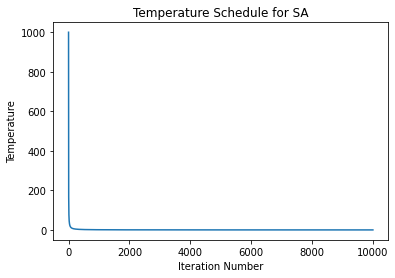

In [ ]:
plt.plot(temps)
plt.xlabel("Iteration Number")
plt.ylabel("Temperature")
plt.title("Temperature Schedule for SA")

In [ ]:
allslots[(allslots["Total Capacity"]*allslots["Scheduled Exams"]<allslots["Used Capacity"]) | (allslots["Total Hours"]<allslots["Used Hours"])]

,Room,Slot,Total Capacity,Total Hours,Used Capacity,Used Hours,Exam 1,Exam 2,Exam 3,Scheduled Exams
1,TRENT-HALL,23rd Jan Afternoon,125,2,21,3.5,R13006E1,F12X04E1,None,2
2,TRENT-HALL,23rd Jan Evening,125,2,28,3.5,R13016E1,F12X04E2,None,2
4,TRENT-HALL,24th Jan Afternoon,125,2,148,3.0,V7A204E1,N1A110E1,None,2
7,TRENT-HALL,25th Jan Afternoon,125,2,77,4.0,H22C20E1,J5BSMAE1,None,2
8,TRENT-HALL,25th Jan Evening,125,2,27,3.0,R23117E1,G111MCE1,None,2
...,...,...,...,...,...,...,...,...,...,...
154,COPSE-3,2nd Feb Afternoon,50,2,65,3.5,V82113E1,EN00P7E1,None,2
155,COPSE-3,2nd Feb Evening,50,2,111,4.0,L12302E1,H6P001E1,None,2
158,COPSE-3,3rd Feb Evening,50,2,316,3.0,R12001E1,M3A010E1,None,2
436,ART-SEMINAR,31st Jan Afternoon,15,2,137,1.0,L12303E1,None,None,1


In [ ]:
allslots[(allslots["Total Capacity"]*allslots["Scheduled Exams"]<allslots["Used Capacity"]) | (allslots["Total Hours"]<allslots["Used Hours"])]["Used Hours"].sum() - allslots[(allslots["Total Capacity"]*allslots["Scheduled Exams"]<allslots["Used Capacity"]) | (allslots["Total Hours"]<allslots["Used Hours"])]["Total Hours"].sum()

169.5

In [ ]:
allslots.to_csv("resolved.csv")

In [ ]:
allslots[(allslots["Total Capacity"]*allslots["Scheduled Exams"]>=allslots["Used Capacity"]) & (allslots["Total Hours"]>=allslots["Used Hours"])]

,Room,Slot,Total Capacity,Total Hours,Used Capacity,Used Hours,Exam 1,Exam 2,Exam 3,Scheduled Exams
0,TRENT-HALL,23rd Jan Morning,125,3,83,3.0,LK10SAE1,H7CLASE1,None,2
3,TRENT-HALL,24th Jan Morning,125,3,35,3.0,R13021E1,F12X04E3,None,2
5,TRENT-HALL,24th Jan Evening,125,2,51,2.0,D21102E1,C81ICAE1,None,2
6,TRENT-HALL,25th Jan Morning,125,3,17,3.0,R23107E1,Q82024E1,None,2
9,TRENT-HALL,26th Jan Morning,125,3,80,2.5,F13I01E1,V82115E1,None,2
...,...,...,...,...,...,...,...,...,...,...
635,SPORT-SMALL II,2nd Feb Evening,135,2,12,2.0,C52303E1,None,None,1
636,SPORT-SMALL II,3rd Feb Morning,135,3,9,2.0,F321Q9E1,None,None,1
637,SPORT-SMALL II,3rd Feb Afternoon,135,2,20,1.0,F12I01E1,None,None,1
638,SPORT-SMALL II,3rd Feb Evening,135,2,20,2.0,F12O01E1,None,None,1


In [ ]:
allslots

,Room,Slot,Total Capacity,Total Hours,Used Capacity,Used Hours,Exam 1,Exam 2,Exam 3,Scheduled Exams
0,TRENT-HALL,23rd Jan Morning,125,3,83,3.0,LK10SAE1,H7CLASE1,None,2
1,TRENT-HALL,23rd Jan Afternoon,125,2,21,3.5,R13006E1,F12X04E1,None,2
2,TRENT-HALL,23rd Jan Evening,125,2,28,3.5,R13016E1,F12X04E2,None,2
3,TRENT-HALL,24th Jan Morning,125,3,35,3.0,R13021E1,F12X04E3,None,2
4,TRENT-HALL,24th Jan Afternoon,125,2,148,3.0,V7A204E1,N1A110E1,None,2
...,...,...,...,...,...,...,...,...,...,...
635,SPORT-SMALL II,2nd Feb Evening,135,2,12,2.0,C52303E1,None,None,1
636,SPORT-SMALL II,3rd Feb Morning,135,3,9,2.0,F321Q9E1,None,None,1
637,SPORT-SMALL II,3rd Feb Afternoon,135,2,20,1.0,F12I01E1,None,None,1
638,SPORT-SMALL II,3rd Feb Evening,135,2,20,2.0,F12O01E1,None,None,1
